In [64]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data = pd.read_csv("mushrooms.csv")

In [66]:
data.shape


(8124, 23)

In [67]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [68]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [69]:
for col in data.columns:
    data[col]=lbl.fit_transform(data[col])

In [70]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [71]:
y=data['class']
x=data.iloc[:,1:23]

In [72]:
x.shape

(8124, 22)

In [73]:
y.shape

(8124,)

In [74]:
x.head

<bound method NDFrame.head of       cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0     

In [75]:
y.head

<bound method NDFrame.head of 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32>

In [76]:
# Using Standard Scaller.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [77]:
print(x)

[[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [78]:
# Using Principal Component Analysis (PCA).

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

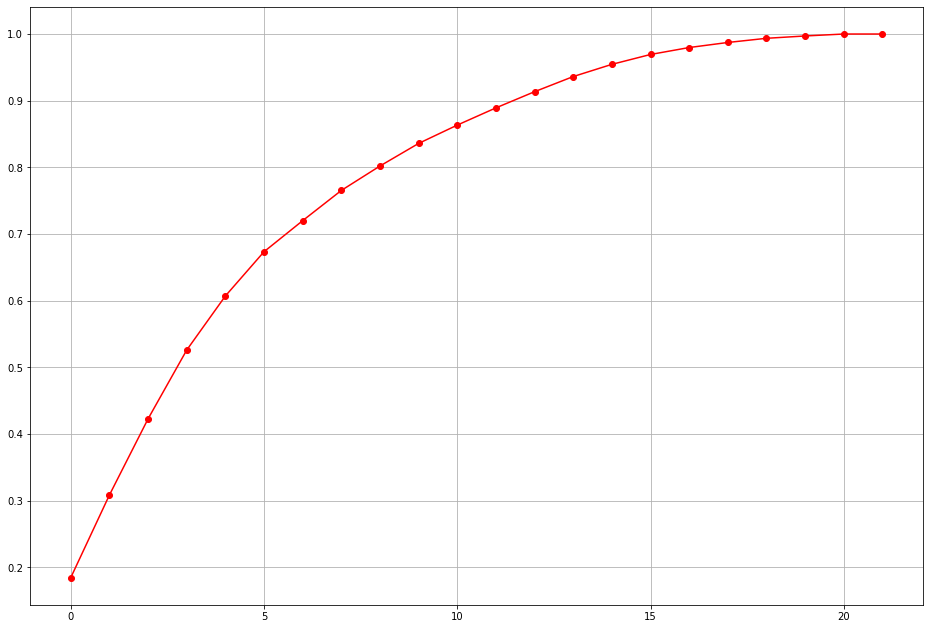

In [79]:
plt.figure(figsize=(16,11))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [80]:
new_pca = PCA(n_components=17)

In [81]:
x_new = new_pca.fit_transform(x)

In [82]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)

In [83]:
k_means.fit_predict(x_new )

array([0, 0, 0, ..., 0, 1, 0])

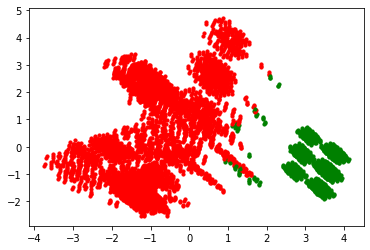

In [84]:
colors = ['r','g']
for i in range(len(x_new)):
    plt.scatter(x_new[i][0], x_new[i][1], c=colors[k_means.labels_[i]], s=10)
plt.show()

In [85]:
x_new.shape

(8124, 17)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25, random_state = 6)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 17)
(6093,)
(2031, 17)
(2031,)


In [89]:
# Using Logistic Regression.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)

In [90]:
lr_predict_prob = lr.predict_proba(x_test)

In [91]:
print(lr_predict)
print(lr_predict_prob[:,1])

[0 1 0 ... 1 0 1]
[0.03604402 0.9481901  0.00154934 ... 0.99951834 0.02289823 0.99985836]


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [93]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

In [94]:
print(lr_conf_matrix)
print(lr_accuracy)

[[1026   34]
 [  83  888]]
0.9423929098966026


In [95]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_predict_prob[:,1] )

In [96]:
from sklearn.metrics import auc
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.9783116025105415


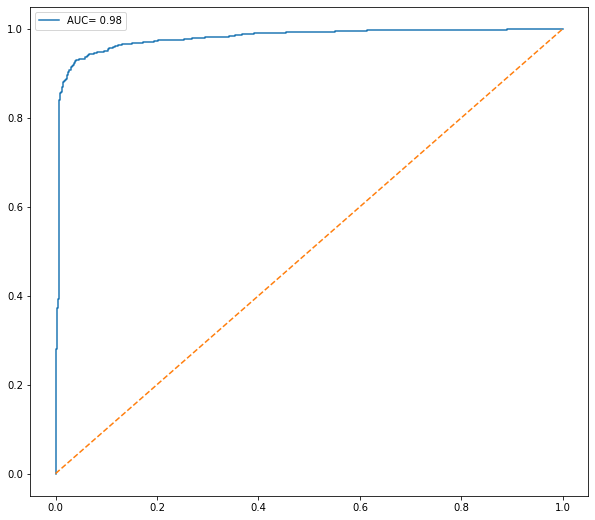

In [97]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [98]:
# Using Naive Bayes.

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

In [99]:
print(gnb_predict)
print(gnb_predict_prob)

[0 1 0 ... 1 0 1]
[[7.57456853e-01 2.42543147e-01]
 [2.29901504e-04 9.99770098e-01]
 [9.99999997e-01 3.03339054e-09]
 ...
 [1.42565352e-04 9.99857435e-01]
 [9.98155863e-01 1.84413674e-03]
 [3.27985711e-04 9.99672014e-01]]


In [100]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_predict_prob[:,1])
gnb_auc = auc(fpr, tpr)
print(gnb_auc)

0.964131511960049


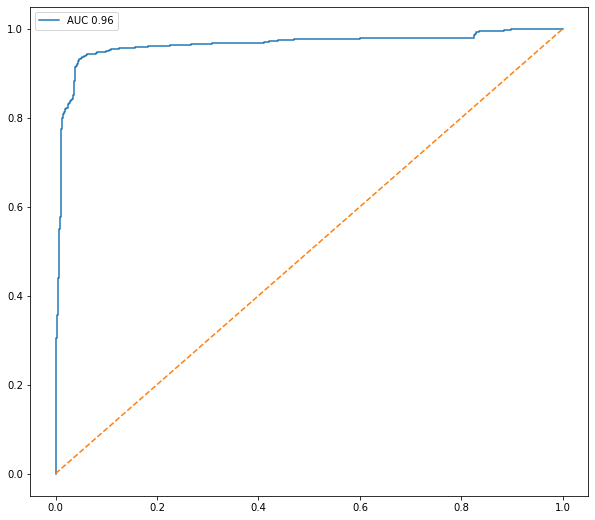

In [102]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % gnb_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [103]:
# Using Decision Tree Classifier.


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [104]:
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [106]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

In [107]:
print(dt_conf_matrix)
print(dt_accuracy_score)

[[1052    8]
 [   5  966]]
0.9935992122107337


In [108]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dt_predict_prob[:,1])
dt_auc = auc(fpr, tpr)
print(dt_auc)

0.996352719429493


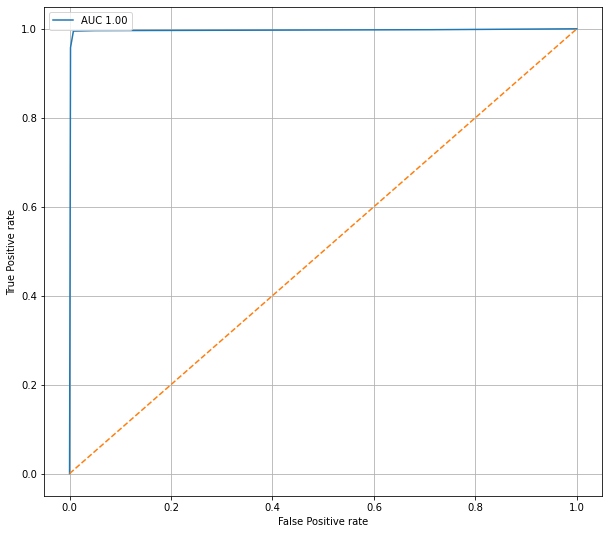

In [109]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % dt_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [110]:
# Using Random Forest.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

In [111]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

In [112]:
print(rf_conf_matrix)
print(rf_accuracy_score)

[[1060    0]
 [   0  971]]
1.0


In [113]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob[:,1])
rf_auc = auc(fpr, tpr)
print(rf_auc)

1.0


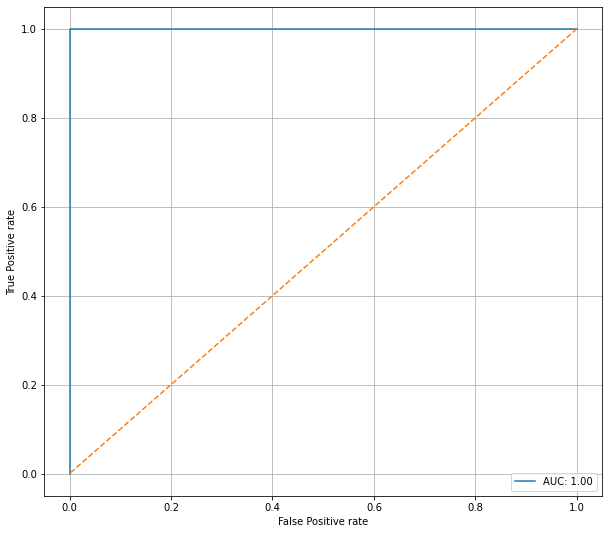

In [114]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid()